### Esercitazione 16 - ROC (Rate of Change)
#### Argomenti

* indicatore ROC

L'indicatore ROC è un indicatore di Momentum e prende in considerazione il confronto tra il prezzo attuale e il prezzo
di un particolare numero di candele precedente, unico parametro di questo indicatore.
Il valore calcolato è la variazione in percentuale, secondo la formula:

ROC = [(P - Pn) / Pn] * 100

dove:
P = prezzo di chiusura attuale
n = numero di candele
Pn = prezzo di chiusura alla n-ma candela precedente

Dà vita a un oscillatore che fluttua sopra e sotto lo zero mentre il tasso di variazione si sposta da positivo a
negativo. Come altri indicatori di Momentum, il ROC ha zone di ipercomprato e ipervenduto che possono essere modificate
in base alle condizioni di mercato.
I valori positivi indicano una pressione o uno slancio di acquisto al rialzo, mentre valori negativi inferiori a
zero indicano una pressione di vendita o uno slancio al ribasso.
Valori crescenti in entrambe le direzioni, positivi o negativi, indicano uno slancio crescente e valori
decrescenti indicano uno slancio calante.

In [1]:
import pandas_datareader as pdr
import mplfinance as mpf
from datetime import datetime, timedelta

In [2]:
start = datetime.now() - timedelta(days=365)
candles = pdr.get_data_yahoo("GOOG", start)

candles.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-30,101.449997,94.669998,95.120003,101.449997,39888100.0,101.449997
2022-12-01,102.589996,100.669998,101.400002,101.279999,21771500.0,101.279999
2022-12-02,101.150002,99.169998,99.370003,100.830002,18812200.0,100.830002
2022-12-05,101.750000,99.355003,99.815002,99.870003,19955500.0,99.870003
2022-12-06,100.209999,96.760002,99.669998,97.309998,20864100.0,97.309998


In [3]:
time_period = 14
candles['roc'] = ((candles['Close'] - candles['Close'].shift(time_period)) / candles['Close'].shift(time_period)) * 100

candles.tail()

,High,Low,Open,Close,Volume,Adj Close,roc
Date,,,,,,,
2022-11-30,101.449997,94.669998,95.120003,101.449997,39888100.0,101.449997,16.075509
2022-12-01,102.589996,100.669998,101.400002,101.279999,21771500.0,101.279999,7.550176
2022-12-02,101.150002,99.169998,99.370003,100.830002,18812200.0,100.830002,4.238601
2022-12-05,101.750000,99.355003,99.815002,99.870003,19955500.0,99.870003,3.998755
2022-12-06,100.209999,96.760002,99.669998,97.309998,20864100.0,97.309998,-1.428286


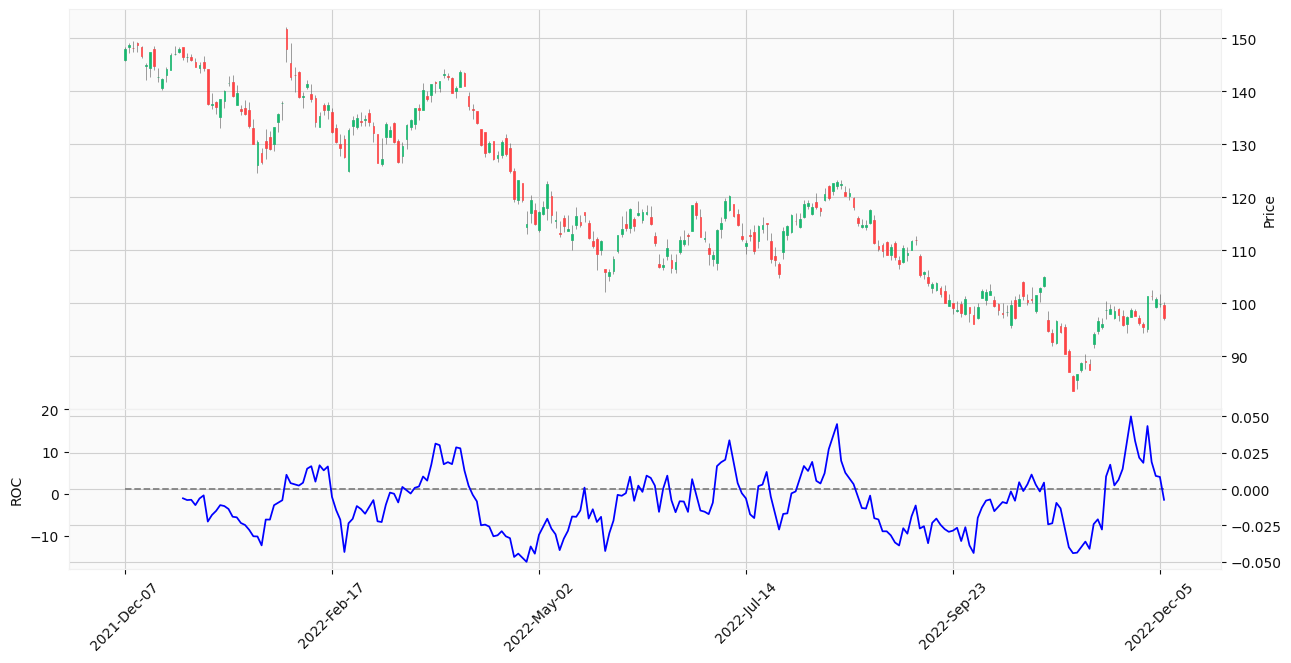

In [4]:
roc_plot = mpf.make_addplot(candles['roc'], color='blue', panel=1, ylabel='ROC')
roc_central_plot = mpf.make_addplot([0] * len(candles), color='gray', linestyle='--', panel=1)
mpf.plot(candles, addplot=[roc_central_plot, roc_plot], type='candle', style='yahoo', figsize=(16, 8))